In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Question 1
poke_data = pd.read_csv('/content/pokemon.csv', sep = ',')

In [4]:
poke_data.shape
# 801 rows/observations (i.e., 801 pokemon)
# 41 columns/variables

(801, 41)

In [5]:
# Question 2
# poke_data
no_name = poke_data.pop('name')
poke_data.insert(0, 'name', no_name)
print(poke_data.head())

         name                    abilities  against_bug  against_dark  \
0   Bulbasaur  ['Overgrow', 'Chlorophyll']          1.0           1.0   
1     Ivysaur  ['Overgrow', 'Chlorophyll']          1.0           1.0   
2    Venusaur  ['Overgrow', 'Chlorophyll']          1.0           1.0   
3  Charmander     ['Blaze', 'Solar Power']          0.5           1.0   
4  Charmeleon     ['Blaze', 'Solar Power']          0.5           1.0   

   against_dragon  against_electric  against_fairy  against_fight  \
0             1.0               0.5            0.5            0.5   
1             1.0               0.5            0.5            0.5   
2             1.0               0.5            0.5            0.5   
3             1.0               1.0            0.5            1.0   
4             1.0               1.0            0.5            1.0   

   against_fire  against_flying  ...  percentage_male  pokedex_number  \
0           2.0             2.0  ...             88.1               1   


In [6]:
# Question 3a
pstat = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
poke_base_stat = poke_data[pstat]
poke_base_stat.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000


In [7]:
# Question 3b
nstat = ['height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'experience_growth', 'base_happiness']
poke_other_stats = poke_data[nstat]
poke_other_stats.describe()

,height_m,weight_kg,base_egg_steps,experience_growth,base_happiness
count,781.000000,781.000000,801.000000,8.010000e+02,801.000000
mean,1.163892,61.378105,7191.011236,1.054996e+06,65.362047
std,1.080326,109.354766,6558.220422,1.602558e+05,19.598948
min,0.100000,0.100000,1280.000000,6.000000e+05,0.000000
25%,0.600000,9.000000,5120.000000,1.000000e+06,70.000000
50%,1.000000,27.300000,5120.000000,1.000000e+06,70.000000
75%,1.500000,64.800000,6400.000000,1.059860e+06,70.000000
max,14.500000,999.900000,30720.000000,1.640000e+06,140.000000


In [ ]:
# Question 3c
# Height Analysis:

# When looking at height, it should be noted that it is reported in meters (most likely due to Pokemon originating in Japan).
# Note that the count for the height variable is 781, while the all other statistics have a count of 801 (excluding weight), meaning that height (and weight) data is missing for some pokemon.
# Looking at the pokemon that do have height data, the average height is 1.16 meters, with a standard deviation of 1.08 meters. This means that the data has a lot of variance (pokemon are much shorter and taller than 1m).
# The smallest pokemon in the poke_data dataframe is 0.1 meters, and the tallest pokemon is 14.5 meters.
# While the tallest pokemon is 14.5 meters tall, the 3rd Quartile is 1.5 meters, meaning that there are some extreme outliers on the tall end!
# Something interesting to note is that the median (middle value) height is 1 meter exactly!

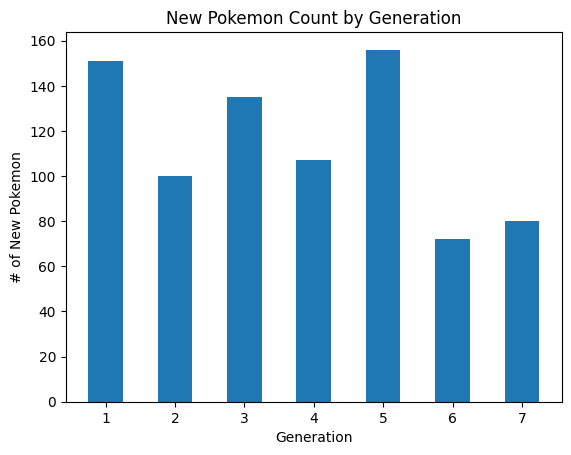

In [8]:
# Question 4
poke_by_gen = poke_data['generation']
gencount = poke_by_gen.value_counts()
# print(gencount)
x = gencount.index
y = gencount.values

plt.bar(x, y, width = 0.5)

plt.xlabel('Generation')
plt.ylabel('# of New Pokemon')

plt.title('New Pokemon Count by Generation')

plt.show()

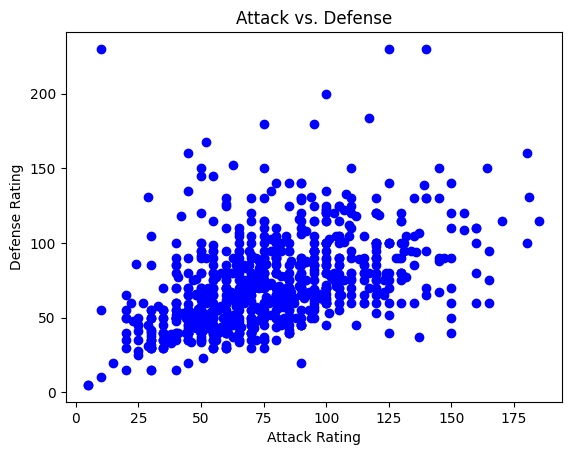

In [9]:
# Question 5a
x = poke_data['attack']
y = poke_data['defense']

plt.scatter(x, y, c = 'b')

plt.xlabel('Attack Rating')
plt.ylabel('Defense Rating')
plt.title('Attack vs. Defense')

plt.show()

In [10]:
# !!! THIS CHUNK IS WRONG, PLEASE IGNORE FOR GRADING !!!

# The reason I left it on the script is that I was looking for an answer on why it didn't work.
# The Traceback didn't make sense to me, I don't understand how it is a TypeError.
# If you have time, I'd love some feedback on this (I couldn't find anything online)

high_attack_defense = {}
for pokemon in poke_data:
  if 'attack' >= 140 and 'defense' >= 130:
    high_attack_defense['attack_score'] = poke_data['attack']
    high_attack_defense['defense_score'] = poke_data['defense']
  else:
    continue
print(high_attack_defense.head())

# !!! THIS CHUNK IS WRONG, PLEASE IGNORE FOR GRADING !!!

TypeError: ignored

In [31]:
# Question 5b & 5c
high_attack_defense = poke_data[(poke_data['attack'] >= 140) & (poke_data['defense'] >= 130)]
# print(len(high_attack_defense))
def legendary_check(x):
  if x == 1:
    return True
  elif x == 0:
    return False
  else:
    print('Error: output is not binary')

In [59]:
# Question 5d

poke_data['leg_status'] = poke_data['is_legendary'].apply(legendary_check)
poke_data
# print(poke_data['leg_status'])

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,leg_status
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1,65,65,45,grass,poison,6.9,1,0,False
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,2,80,80,60,grass,poison,13.0,1,0,False
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,3,122,120,80,grass,poison,100.0,1,0,False
3,Charmander,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,False
4,Charmeleon,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,797,107,101,61,steel,flying,999.9,7,1,True
797,Kartana,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,True
798,Guzzlord,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,799,97,53,43,dark,dragon,888.0,7,1,True
799,Necrozma,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,800,127,89,79,psychic,NaN,230.0,7,1,True


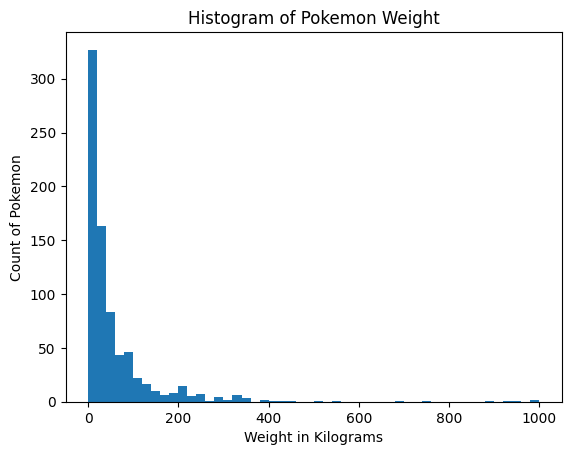

In [37]:
# Question 6

plt.hist(poke_data['weight_kg'], bins = 50)

plt.xlabel('Weight in Kilograms')
plt.ylabel('Count of Pokemon')
plt.title('Histogram of Pokemon Weight')

plt.show()

<ipython-input-58-f95fd3ccffca>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_gen_data = poke_data.groupby('generation').mean()


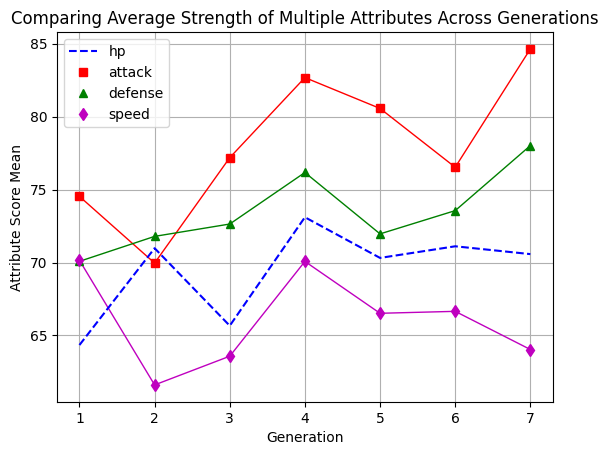

In [58]:
# Qustion 7
avg_gen_data = poke_data.groupby('generation').mean()
# print(gen_data)
# plt.plot(avg_gen_data['hp'], c = 'b', linewidth = 1.0)
plt.plot(avg_gen_data['attack'], c = 'r', linewidth = 1.0)
plt.plot(avg_gen_data['defense'], c = 'g', linewidth = 1.0)
plt.plot(avg_gen_data['speed'], c = 'm', linewidth = 1.0)
# plt.show()

plt.plot(avg_gen_data['hp'],'b--', label = 'hp')
plt.plot(avg_gen_data['attack'],'rs', label = 'attack')
plt.plot(avg_gen_data['defense'],'g^', label = 'defense')
plt.plot(avg_gen_data['speed'],'md', label = 'speed')

plt.grid()
plt.legend()

plt.xlabel('Generation')
plt.ylabel('Attribute Score Mean')
plt.title('Comparing Average Strength of Multiple Attributes Across Generations')

plt.show()